In [26]:
#Virginia Pan 
#ECE 488 
#Image Noise HW-Part 2

#import libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

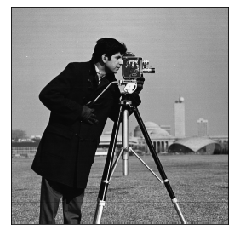

In [27]:
#load image file (signal 1) in grayscale and plot
sigma = 10.0 #for noise generation
S1 = cv2.imread('cameraman.png',0)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(S1, cmap='gray', vmin=0, vmax=255)

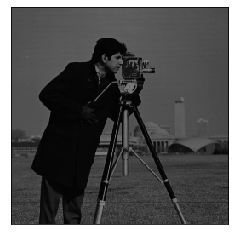

In [28]:
#make signal 2 (one half of signal 1) and plot
S2 = S1/2
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(S2, cmap='gray', vmin=0, vmax=255)

In [29]:
#generate normally distributed noise (with same dimensions as picture)
N1 = np.random.normal(loc=0.0, scale=sigma, size=S1.shape)
#plt.imshow(N1, cmap='gray', vmin=0, vmax=255)
N2 = np.random.normal(loc=0.0, scale=sigma, size=S2.shape)
#plt.imshow(N2, cmap='gray', vmin=0, vmax=255)

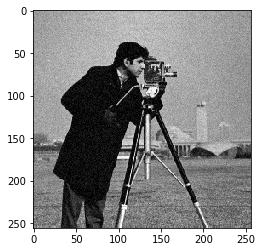

In [30]:
#generate and plot image 1
I1 = S1+N1
plt.imshow(I1, cmap='gray', vmin=0, vmax=255)

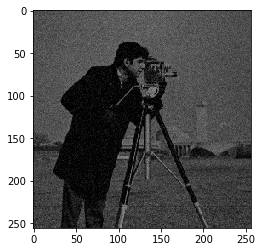

In [31]:
#generate and plot image 2
I2 = S2+N2
plt.imshow(I2, cmap='gray', vmin=0, vmax=255)

In [32]:
#function for calculating energy
def energy(x):
    w, h = x.shape
    M = w*h
    energy = (1/M)*sum(sum(x**2.0))
    return energy

In [33]:
#calculate energies
eI1 = energy(I1)
print('energy of I1:', eI1)
eI2 = energy(I2)
print('energy of I2:',eI2)
eS1 = energy(S1)
print('energy of S1:',eS1)
eS2 = energy(S2)
print('energy of S2:',eS2)
eN1 = energy(N1)
print('energy of N1:',eN1)
eN2 = energy(N2)
print('energy of N2:',eN2)

energy of I1: 18074.006385239838
energy of I2: 4602.355180011776
energy of S1: 17981.934051513672
energy of S2: 4495.483512878418
energy of N1: 99.65036340505901
energy of N2: 100.25652550079982


In [34]:
#calculate SNRs
SNR_I1 = eS1/eN1
print('SNR of I1:', SNR_I1)
SNR_I2 = eS2/eN2
print('SNR of I2:', SNR_I2)

SNR of I1: 180.45026066207774
SNR of I2: 44.839809582694485


In [35]:
#function (point operation) f as defined from c of part 1
def f(x):
    return np.sqrt((eS1+eN1)/(0.25*eS1+eN1)) * x

energy of I2hat: 18109.99982488598


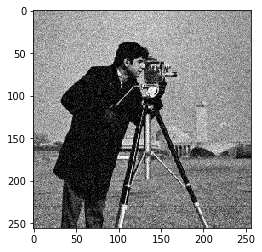

In [36]:
#generate and plot I2hat
I2hat = f(I2)
plt.imshow(I2hat, cmap='gray', vmin=0, vmax=255)

#calculate energy of I2hat
eI2hat = energy(I2hat)
print('energy of I2hat:',eI2hat)

In [37]:
#calculate S2hat and its energy
S2hat = f(S2)
#plt.imshow(S2hat, cmap='gray', vmin=0, vmax=255)
eS2hat = energy(S2hat)
print('energy of S2hat:',eS2hat)

energy of S2hat: 17689.466033518445


In [38]:
#calculate N2hat and its energy
N2hat = f(N2)
eN2hat = energy(N2hat)
print('energy of N2hat:',eN2hat)

#calculate SNR for I2hat
SNR_I2hat = eS2hat/eN2hat
print('SNR of I2hat:', SNR_I2hat)

energy of N2hat: 394.5035939747953
SNR of I2hat: 44.8398095826945


In [39]:
def RMSE(x,y):
    w, h = x.shape
    M = w*h
    dif = x-y
    RMSE = ((1/M)*sum(sum(dif**2.0)))**0.5
    return RMSE

In [40]:
#RMSE caluclations based on d in part 1
RMSE_I1_S1 = RMSE(I1,S1)
print('RMSE(I1,S1)',RMSE_I1_S1)
RMSE_I2_S2 = RMSE(I2,S2)
print('RMSE(I2,S2)',RMSE_I2_S2)
RMSE_I2hat_S1 =RMSE(I2hat,S1)
print('RMSE(I2hat,S1)',RMSE_I2hat_S1)

RMSE(I1,S1) 9.982502862762374
RMSE(I2,S2) 10.012818059907003
RMSE(I2hat,S1) 19.88688706185835


In [41]:
#RMSE caluclations based on d in part 1
#RMSE_I1_S1 = sigma
#print('RMSE(I1,S1)',RMSE_I1_S1)
#RMSE_I2_S2 = sigma
#print('RMSE(I2,S2)',RMSE_I2_S2)
#w, h = I2hat.shape
#M = w*h 
#RMSE_I2hat_S1 = ((1/M)*sum(sum((0.5*f(S1))+f(N1)-S1))**2.0)**0.5
#print('RMSE(I2hat,S1)',RMSE_I2hat_S1)

In [42]:
#for comparison
print('E(I2):', eI2)
print('E(I2hat):',eI2hat)
print('RMSE(I1,S1):',RMSE_I1_S1)
print('RMSE(I2hat,S1):',RMSE_I2hat_S1)

E(I2): 4602.355180011776
E(I2hat): 18109.99982488598
RMSE(I1,S1): 9.982502862762374
RMSE(I2hat,S1): 19.88688706185835
